In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import h5py

# Configure Matplotlib to use specific font types and set default font size
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 16})

# Set save path and a flag to determine if figures should be saved
save_path = '..\\'
is_save = False


Read data in each frame of a file

### Variables's description

    frame_helperarr: (np.ndarray), (2,)
    Info: Binary variables for kill and death events.
    Detail: [kill_event, death_event]
        kill_event(_bool_): True if the player killed an enemy in the current frame.
        death_event(_bool_): True if the player died in the current frame.

    

    frame_x: np.ndarray, (498, 824, 3)
    Info: RGB image data after being resized.



    
    frame_xaux: np.ndarray, (n*18,) with n is the number of previous frames used for training
    Info: Contains the auxiliary input features used for training. Specifically, for each time step, it stores information about the player's previous actions and game state
    Detail: np.zeros(int(ACTIONS_PREV*[aux_input_lengtkeys_pressed_onehot,Lclicks_onehot,Rclicks_onehot,mouse_x,mouse_y,health,ammo,team]))
        - keys_pressed_onehot(_np.ndarray_) (11,): One-hot encoding of the keys pressed by the player in the current frame.
        [w, a, s, d, space, ctrl, shift, 1, 2, 3, r]
        - Lclicks_onehot(_np.ndarray_) (1,): One-hot encoding of the left mouse clicks by the player in the current frame.
        [left_click]
        - Rclicks_onehot(_np.ndarray_) (1,): One-hot encoding of the right mouse clicks by the player in the current frame.
        [right_click]
        - mouse_x(_float_): The x-coordinate (normalised) of the mouse in the current frame.
        - mouse_y(_float_): The y-coordinate (normalised) of the mouse in the current frame.
        - health(_int_): The player's health in the current frame.
        - ammo(_int_): The player's ammo in the current frame.
        - team(_int_): The player's team in the current frame.

    



    frame_y: np.ndarray, (51,)
    Info: Contains the target labels used for training, which represent the predicted actions or outputs for the bot
    Detail: np.concatenate([keys_pressed_onehot,Lclicks_onehot,Rclicks_onehot,mouse_x_onehot,mouse_y_onehot])
        - keys_pressed_onehot(_np.ndarray_) (11,): One-hot encoding of the keys pressed by the player in the current frame.
        [w, a, s, d, space, ctrl, shift, 1, 2, 3, r]
        - Lclicks_onehot(_np.ndarray_) (1,): One-hot encoding of the left mouse clicks by the player in the current frame.
        [left_click]
        - Rclicks_onehot(_np.ndarray_) (1,): One-hot encoding of the right mouse clicks by the player in the current frame.
        [right_click]
        - mouse_x_onehot(_np.ndarray_) (23,): One-hot encoding of the x-coordinate of the mouse that match with the posibility bin.
        [-1000.0,-500.0, -300.0, ... , 300.0, 500.0,1000.0]
        - mouse_y_onehot(_np.ndarray_) (15,): One-hot encoding of the y-coordinate of the mouse that match with the posibility bin.
        [-200.0, -100.0, -50.0, -20.0, -10.0, -4.0, -2.0, -0.0, 2.0, 4.0, 10.0, 20.0, 50.0, 100.0, 200.0]


    

In [4]:
# Load the HDF5 file
with h5py.File(f'C:\\Users\\Admin\\Downloads\\hdf5_dm_inferno_expert_1.hdf5', 'r') as f:
    # Accessing the first frame's datasets
    frame_helperarr = f['frame_0_helperarr'][:]  # Reading the helper array
    frame_x = f['frame_0_x'][:]  # Reading the image data
    frame_xaux = f['frame_0_xaux'][:]  # Reading auxiliary data
    frame_y = f['frame_0_y'][:]  # Reading the y data
    
    # Print the contents
    print("Helper Array (frame_0_helperarr):")
    print(frame_helperarr)

    
    print("\nImage Data (frame_0_x):")
    print(frame_x)  # You can print the full data or summarize it due to its size



    print("\nAuxiliary Data (frame_0_xaux):")
    print(frame_xaux)


    
    print("\nY Data (frame_0_y):")
    print(frame_y)



Helper Array (frame_0_helperarr):
[0. 0.]

Image Data (frame_0_x):
[[[ 31  39  35]
  [ 35  39  33]
  [ 33  37  32]
  ...
  [215 166 124]
  [185 142 106]
  [163 125  91]]

 [[ 30  35  32]
  [ 32  39  37]
  [ 32  37  33]
  ...
  [217 168 126]
  [216 167 125]
  [216 168 126]]

 [[ 29  34  33]
  [ 28  35  34]
  [ 26  33  32]
  ...
  [217 169 126]
  [217 168 126]
  [217 169 126]]

 ...

 [[ 67  91 127]
  [ 63  85 125]
  [ 65  88 133]
  ...
  [ 78  86  88]
  [ 64  72  75]
  [ 49  56  58]]

 [[ 80 113 160]
  [ 79 114 154]
  [ 90 128 167]
  ...
  [ 68  80  80]
  [ 57  65  67]
  [ 50  57  59]]

 [[ 85 116 161]
  [109 144 184]
  [116 150 185]
  ...
  [ 64  69  70]
  [ 46  55  55]
  [ 48  56  58]]]

Auxiliary Data (frame_0_xaux):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

Y Data (frame_0_y):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0

Read data in each frame from the author's data file

In [ ]:
# file directory
file = 'C:\\Users\\Admin\\Downloads\\agentj22_capture1.npy'

# load content of the file
data = np.load(file, allow_pickle=True)
print(data[0])

[list([])
 {'obs_mode': 0, 'gsi_team': 'T', 'gsi_health': 100, 'gsi_kills': 0, 'gsi_deaths': 5, 'gsi_weapons': {'weapon_0': {'name': 'weapon_knife_t', 'paintkit': 'default', 'type': 'Knife', 'state': 'holstered'}, 'weapon_1': {'name': 'weapon_glock', 'paintkit': 'default', 'type': 'Pistol', 'ammo_clip': 20, 'ammo_clip_max': 20, 'ammo_reserve': 120, 'state': 'holstered'}, 'weapon_2': {'name': 'weapon_ak47', 'paintkit': 'default', 'type': 'Rifle', 'ammo_clip': 30, 'ammo_clip_max': 30, 'ammo_reserve': 90, 'state': 'active'}}, 'found_active': True, 'gsi_weap_active': {'name': 'weapon_ak47', 'paintkit': 'default', 'type': 'Rifle', 'ammo_clip': 30, 'ammo_clip_max': 30, 'ammo_reserve': 90, 'state': 'active'}, 'gsi_ammo': 30, 'obs_health': 100, 'obs_fov': 90, 'obs_scope': 0, 'localpos1': -1150.0, 'localpos2': -550.0, 'localpos3': 130.1982879638672, 'height': 64.06256103515625, 'vel_1': 0.0, 'vel_2': 0.0, 'vel_3': 0.0, 'vel_mag': 0.0, 'viewangle_vert': 5.500000476837158, 'viewangle_xy': -25.465

In [ ]:
# file directory
file = 'C:\\Users\\Admin\\Downloads\\currvarsv2_dm_july2021_1_to_100.npy'

# load content of the file
data = np.load(file, allow_pickle=True)
data.item()['file_num1_frame_50']

[{'obs_mode': 4,
  'gsi_team': 'T',
  'gsi_health': 100,
  'gsi_kills': 0,
  'gsi_deaths': 0,
  'gsi_weapons': {'weapon_0': {'name': 'weapon_knife_t',
    'paintkit': 'default',
    'type': 'Knife',
    'state': 'holstered'},
   'weapon_1': {'name': 'weapon_deagle',
    'paintkit': 'default',
    'type': 'Pistol',
    'ammo_clip': 7,
    'ammo_clip_max': 7,
    'ammo_reserve': 35,
    'state': 'holstered'},
   'weapon_2': {'name': 'weapon_ak47',
    'paintkit': 'default',
    'type': 'Rifle',
    'ammo_clip': 30,
    'ammo_clip_max': 30,
    'ammo_reserve': 90,
    'state': 'active'}},
  'found_active': True,
  'gsi_weap_active': {'name': 'weapon_ak47',
   'paintkit': 'default',
   'type': 'Rifle',
   'ammo_clip': 30,
   'ammo_clip_max': 30,
   'ammo_reserve': 90,
   'state': 'active'},
  'gsi_ammo': 30,
  'obs_health': 100,
  'obs_fov': 90,
  'obs_scope': 0,
  'localpos1': 1308.7227783203125,
  'localpos2': 1797.400390625,
  'localpos3': 1.03125,
  'height': 64.06256103515625,
  'vel_

Read data in each frame from the our data file for comparison

### Variables's description
##### *Note: Each frame of the data file contains the following variables: 
[img, curr_vars, infer_a ,y_train_i ,x_aux_i ,helper_arr_i]
    
    img: (_np.ndarray_), (150, 412, 3)
    Info: RGB image data after being resized.

    

    curr_vars: dict
    Info: Contains information about the current state of a player in a game
    Detail: 
        - 'gsi_team'(_str_): The team of the player ('T' for Terrorist, 'CT' for Counter-Terrorist).
        - 'gsi_health'(_int_): The current health of the player.
        - 'gsi_kills'(_int_): The number of kills the player has achieved.
        - 'gsi_deaths'(_int_): The number of times the player has died.
        - 'gsi_weapons'(_dict_): A dictionary containing details about the player's weapons.
        - Each weapon is indexed (e.g., 'weapon_0', 'weapon_1') and contains:
            - 'name'(_str_): The internal name of the weapon.
            - 'paintkit'(_str_): The paint skin of the weapon.
            - 'type'(_str_): The type of weapon (e.g., 'Knife', 'Rifle', 'Pistol').
            - 'ammo_clip'(_int_, optional): The current ammunition in the weapon's clip.
            - 'ammo_clip_max'(_int_, optional): The maximum ammunition the weapon's clip can hold.
            - 'ammo_reserve'(_int_, optional): The total reserve ammunition available.
            - 'state'(_str_): The current state of the weapon (e.g., 'active', 'holstered').
        - 'found_active'(_bool_): Indicates if an active item was found.
        - 'gsi_weap_active'(_dict_): Details of the currently active weapon, structured like 'gsi_weapons'.
        - 'gsi_ammo'(_int_): The current ammunition count of the active weapon.
        - 'localpos1'(_float_): The player's X-coordinate in the game world.
        - 'localpos2'(_float_): The player's Y-coordinate in the game world.
        - 'localpos3'(_float_): The player's Z-coordinate in the game world.
        - 'vel_1'(_float_): The player's velocity in the X direction.
        - 'vel_2'(_float_): The player's velocity in the Y direction.
        - 'vel_3'(_float_): The player's velocity in the Z direction.
        - 'vel_mag'(_float_): The magnitude of the player's velocity vector.
        - 'viewangle_vert'(_float_): The player's vertical view angle in degrees.
        - 'viewangle_xy'(_float_): The player's horizontal view angle in degrees.
        - 'zvert_rads'(_float_): The vertical angle in radians.
        - 'xy_rad'(_float_): The horizontal angle in radians.
        - 'vel_theta_abs'(_float_): The absolute theta angle of the velocity vector.
        - 'vel_theta_rel'(_float_): The relative theta angle of the velocity vector.


    
    infer_a: list, length=5
    Info: Contains information related to an action taken by a player in a frame
    Detail: [list_keys_pressed, mouse_x, mouse_y, press_mouse_l, press_mouse_r]
        - list_keys_pressed(_list_): A list of action keys pressed by the player.
        Example: ['w'] indicates the 'move forward' action.
        - mouse_x(_float_): The change in the player's position along the X-axis.
        - mouse_y(_float_): The change in the player's position along the Y-axis.
        - press_mouse_l(_int_): Self explanatory
        - press_mouse_r(_int_): Self explanatory

    



    y_train_i: np.ndarray, (51,)
    Info: Contains the target labels used for training, which represent the predicted actions or outputs for the bot
    Detail: np.concatenate([keys_pressed_onehot,Lclicks_onehot,Rclicks_onehot,mouse_x_onehot,mouse_y_onehot])
        - keys_pressed_onehot(_np.ndarray_) (11,): One-hot encoding of the keys pressed by the player in the current frame.
        [w, a, s, d, space, ctrl, shift, 1, 2, 3, r]
        - Lclicks_onehot(_np.ndarray_) (1,): One-hot encoding of the left mouse clicks by the player in the current frame.
        [left_click]
        - Rclicks_onehot(_np.ndarray_) (1,): One-hot encoding of the right mouse clicks by the player in the current frame.
        [right_click]
        - mouse_x_onehot(_np.ndarray_) (23,): One-hot encoding of the x-coordinate of the mouse that match with the posibility bin.
        [-1000.0,-500.0, -300.0, ... , 300.0, 500.0,1000.0]
        - mouse_y_onehot(_np.ndarray_) (15,): One-hot encoding of the y-coordinate of the mouse that match with the posibility bin.
        [-200.0, -100.0, -50.0, -20.0, -10.0, -4.0, -2.0, -0.0, 2.0, 4.0, 10.0, 20.0, 50.0, 100.0, 200.0]




    x_aux_i: np.ndarray, (n*18,) with n is the number of previous frames used for training
    Info: Contains the auxiliary input features used for training. Specifically, for each time step, it stores information about the player's previous actions and game state
    Detail: np.zeros(int(ACTIONS_PREV*[aux_input_lengtkeys_pressed_onehot,Lclicks_onehot,Rclicks_onehot,mouse_x,mouse_y,health,ammo,team]))
        - keys_pressed_onehot(_np.ndarray_) (11,): One-hot encoding of the keys pressed by the player in the current frame.
        [w, a, s, d, space, ctrl, shift, 1, 2, 3, r]
        - Lclicks_onehot(_np.ndarray_) (1,): One-hot encoding of the left mouse clicks by the player in the current frame.
        [left_click]
        - Rclicks_onehot(_np.ndarray_) (1,): One-hot encoding of the right mouse clicks by the player in the current frame.
        [right_click]
        - mouse_x(_float_): The x-coordinate (normalised) of the mouse in the current frame.
        - mouse_y(_float_): The y-coordinate (normalised) of the mouse in the current frame.
        - health(_int_): The player's health in the current frame.
        - ammo(_int_): The player's ammo in the current frame.
        - team(_int_): The player's team in the current frame.




    helper_arr_i: (np.ndarray), (2,)
    Info: Binary variables for kill and death events.
    Detail: [kill_event, death_event]
        kill_event(_bool_): True if the player killed an enemy in the current frame.
        death_event(_bool_): True if the player died in the current frame.
    

In [ ]:
# Load the HDF5 file
with h5py.File('..\\raw_data\\hdf5_dm_test_auto_601.hdf5', 'r') as f:
    # Accessing the first frame's datasets
    frame_helperarr = f['frame_0_helperarr'][:]  # Reading the helper array
    frame_x = f['frame_0_x'][:]  # Reading the image data
    frame_xaux = f['frame_0_xaux'][:]  # Reading auxiliary data
    frame_y = f['frame_0_y'][:]  # Reading the y data
    
    # Print the contents
    print("Helper Array (frame_0_helperarr):")
    print(frame_helperarr)

    
    print("\nImage Data (frame_0_x):")
    print(frame_x)  # You can print the full data or summarize it due to its size



    print("\nAuxiliary Data (frame_0_xaux):")
    print(frame_xaux)


    
    print("\nY Data (frame_0_y):")
    print(frame_y)

Helper Array (frame_0_helperarr):
[0. 0.]
<class 'numpy.ndarray'>

Image Data (frame_0_x):
[[[141 157 168]
  [135 154 170]
  [112 136 158]
  ...
  [144 143 146]
  [148 150 156]
  [151 154 161]]

 [[141 158 168]
  [141 158 168]
  [135 155 170]
  ...
  [145 145 149]
  [148 150 155]
  [151 154 161]]

 [[141 158 168]
  [141 158 168]
  [141 158 168]
  ...
  [144 144 148]
  [147 148 153]
  [147 147 152]]

 ...

 [[107 116 129]
  [106 116 130]
  [103 115 128]
  ...
  [105 106 107]
  [ 66  61  36]
  [ 65  60  36]]

 [[109 117 134]
  [106 111 125]
  [106 113 128]
  ...
  [ 75  70  46]
  [ 69  63  38]
  [ 67  62  37]]

 [[104 110 124]
  [103 110 119]
  [103 112 124]
  ...
  [ 71  66  39]
  [ 71  66  39]
  [ 69  64  39]]]
<class 'numpy.ndarray'>

Auxiliary Data (frame_0_xaux):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
<class 'numpy.ndarray'>

Y Data (frame_0_y):
[0. 0. 0. 0.

In [2]:
# file directory
file = 'E:\\raw_data_npy\\dm_test_auto_1.npy'

data = np.load(file, allow_pickle=True)
#print(data[1][1])
print(data[1]) # [img, curr_vars, infer_a ,y_train_i ,x_aux_i ,helper_arr_i]

[array([[[108, 103,  93],
         [124, 114,  98],
         [117, 108, 105],
         ...,
         [102, 107, 109],
         [101,  99, 105],
         [ 96,  97, 109]],

        [[108, 103,  93],
         [124, 114,  98],
         [117, 108, 105],
         ...,
         [102, 107, 109],
         [101,  99, 105],
         [ 96,  97, 109]],

        [[108, 103,  93],
         [124, 114,  98],
         [117, 108, 105],
         ...,
         [102, 107, 109],
         [101,  99, 105],
         [ 96,  97, 109]],

        ...,

        [[117,  98,  90],
         [117, 102,  93],
         [120, 105,  96],
         ...,
         [ 99,  80,  74],
         [ 92,  83,  72],
         [ 79,  79,  68]],

        [[117,  98,  90],
         [117, 102,  93],
         [120, 105,  96],
         ...,
         [ 99,  80,  74],
         [ 92,  83,  72],
         [ 79,  79,  68]],

        [[117,  98,  90],
         [117, 102,  93],
         [120, 105,  96],
         ...,
         [ 99,  80,  74],
        

In [ ]:
# file directory
file = 'D:\\raw_data_npy\\dm_test_auto_1.npy'

data = np.load(file, allow_pickle=True)
#print(data[1][1])
print(data[1]) # [img, curr_vars, infer_a ,y_train_i ,x_aux_i ,helper_arr_i]

[array([[[100, 123,  91],
         [100, 119,  95],
         [ 92, 111,  86],
         ...,
         [132, 141, 156],
         [144, 161, 179],
         [192, 216, 240]],

        [[101, 128,  94],
         [ 97, 125,  91],
         [ 98, 118,  90],
         ...,
         [149, 162, 177],
         [180, 203, 225],
         [203, 228, 252]],

        [[ 94, 126,  89],
         [ 97, 124,  87],
         [ 96, 131,  98],
         ...,
         [177, 200, 219],
         [193, 217, 241],
         [212, 237, 255]],

        ...,

        [[176, 128,  85],
         [136, 104,  77],
         [217, 153,  95],
         ...,
         [ 97,  94,  81],
         [ 96,  89,  84],
         [ 91,  84,  84]],

        [[128, 102,  74],
         [106,  89,  68],
         [138, 103,  76],
         ...,
         [ 87,  86,  76],
         [ 88,  83,  82],
         [ 85,  83,  78]],

        [[ 91,  87,  69],
         [ 93,  86,  72],
         [ 92,  77,  65],
         ...,
         [ 90,  86,  86],
        

In [28]:
# Load .npy files containing game data from the specified folder
folder_path = 'E:\\raw_data_npy'

# List all files with .npy extension in the folder
npy_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]
# npy_files = []
# for i in range(305, 600):
#     npy_files.append(f'E:\\raw_data_npy\\dm_test_auto_{i}.npy')
# Initialize lists to store information extracted from frames
info_array = []
weap_arr = []
weap_type_arr = []
# Initialize a dictionary to count button presses
button_press_count = {}

# Iterate through each .npy file
for npy_file in npy_files:
    data = np.load(npy_file, allow_pickle=True)  # Load .npy file

    prev_mouse = (0, 0)

    # Iterate through frames in the loaded data
    for frame in data:
        # Extract relevant information from the frame
        mousex = frame[2][1]
        mousey = frame[2][2]
        pos1 = frame[1]['localpos1']
        pos2 = frame[1]['localpos2']
        pos3 = frame[1]['localpos3']
        kill_flag = frame[5][0]
        death_flag = frame[5][1]
        buttons = frame[2][0]  # Get the list of buttons pressed
        
        # Count each button pressed
        for button in buttons:
            if button not in button_press_count:
                button_press_count[button] = 0  # Initialize count if not present
            button_press_count[button] += 1  # Increment button press count

        # Check for active weapon information
        if 'gsi_weap_active' in frame[1].keys():
            weap_arr.append(frame[1]['gsi_weap_active']['name'])
            weap_type_arr.append(frame[1]['gsi_weap_active']['type'] if 'taser' not in frame[1]['gsi_weap_active']['name'] else 'taser')
        else:
            weap_arr.append('none found')
            weap_type_arr.append('none found')

        # Flag for AK-47 usage
        ak_flag = 1 if 'ak47' in weap_arr[-1] else 0

        # Check if mouse position is stable
        same_mouse_flag = 1 if (mousex < prev_mouse[0] * 1.1 and mousex > prev_mouse[0] * 0.9 and mousex != 0) else 0
        
        # Append the extracted information to the info array
        info_array.append([pos1, pos2, pos3, mousex, mousey, kill_flag, death_flag, ak_flag, same_mouse_flag])
        prev_mouse = (mousex, mousey)

# Convert info_array to a NumPy array for easier manipulation
info_array = np.array(info_array)

# Convert the button press count dictionary to arrays for plotting
buttons = list(button_press_count.keys())
press_counts = list(button_press_count.values())


In [29]:
# Calculate and print various game metrics based on the extracted information

# Separate arrays for kills and deaths
kill_arr = info_array[info_array[:, 5] == 1]
death_arr = info_array[info_array[:, 6] == 1]
ak_arr = info_array[info_array[:, 7] == 1]

# Print total metrics
print('Total frames:', info_array.shape[0])
print('Total kills:', info_array[:, 5].sum())
print('Total deaths:', info_array[:, 6].sum())
print('Total AK frames:', info_array[:, 7].sum())
print('Total AK kills:', ak_arr[:, 5].sum())
print('Total AK deaths:', ak_arr[:, 6].sum())
print('Mean AK kills:', ak_arr[:, 5].mean())
print('Mean AK deaths:', ak_arr[:, 6].mean())


Total frames: 1800000
Total kills: 30721.0
Total deaths: 15427.0
Total AK frames: 729328.0
Total AK kills: 15541.0
Total AK deaths: 132.0
Mean AK kills: 0.021308656736063882
Mean AK deaths: 0.00018098852642432485


In [30]:
# Count the occurrences of each weapon type used throughout the game

weap_count_dict = {}
for w in weap_arr:
    # Count weapon occurrences
    weap_count_dict[w] = weap_count_dict.get(w, 0) + 1

# Special handling for knives and M4A1
knife_total = sum(v for k, v in weap_count_dict.items() if 'knife' in k)
weap_count_dict['weapon_knives'] = knife_total
weap_count_dict['weapon_m4a1'] = sum(v for k, v in weap_count_dict.items() if 'm4a1' in k)

# Prepare arrays for plotting weapon counts
weap_count_arr = []
weap_count_name = []
for w in weap_count_dict.keys():
    if w != 'none found':
        weap_count_name.append(w[7:])  # Remove prefix from weapon names
        weap_count_arr.append(weap_count_dict[w])

# Convert to NumPy arrays and normalize counts
weap_count_arr = np.array(weap_count_arr)
weap_count_name = np.array(weap_count_name)
ids_order = np.argsort(weap_count_arr)
weap_count_arr = weap_count_arr[ids_order]
weap_count_name = weap_count_name[ids_order]
weap_count_arr = weap_count_arr / weap_count_arr.sum()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21832\985371183.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


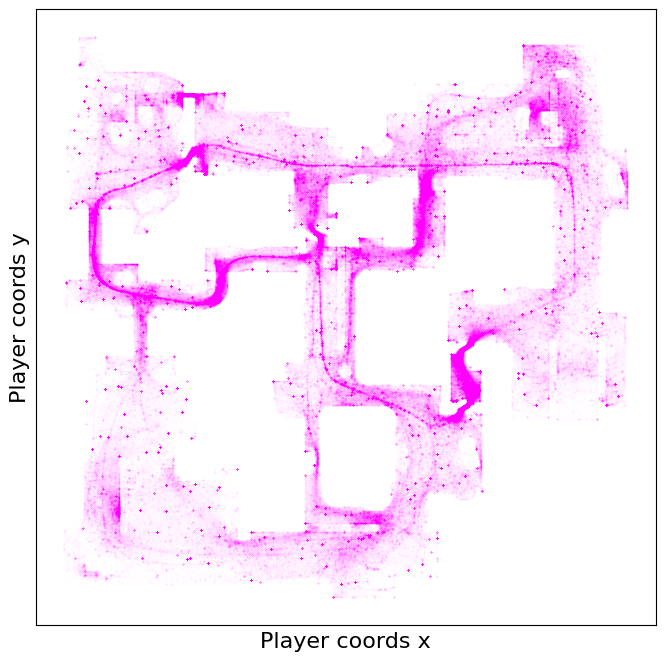

In [39]:
# Create a scatter plot of player coordinates

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(info_array[:, 0], info_array[:, 1], alpha=0.005, s=4, lw=0., color='magenta')
ax.set_xlabel('Player coords x')
ax.set_ylabel('Player coords y')
ax.set_xticks([])
ax.set_yticks([])
fig.show()

# Save the figure if the save flag is set
if is_save:
    fig.savefig(os.path.join(save_path, 'dataset_trajs.png'), format='png', dpi=500, bbox_inches='tight')


C:\Users\Admin\AppData\Local\Temp\ipykernel_21832\2950797401.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
C:\Users\Admin\AppData\Local\Temp\ipykernel_21832\2950797401.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


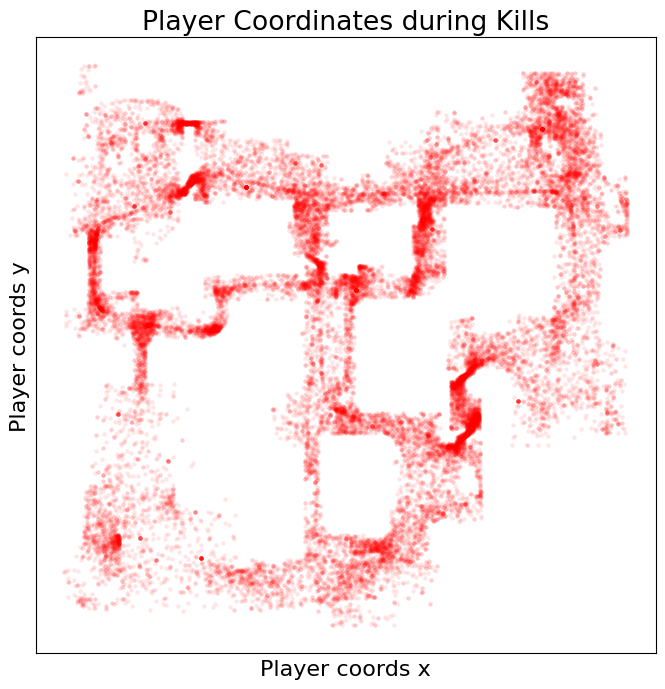

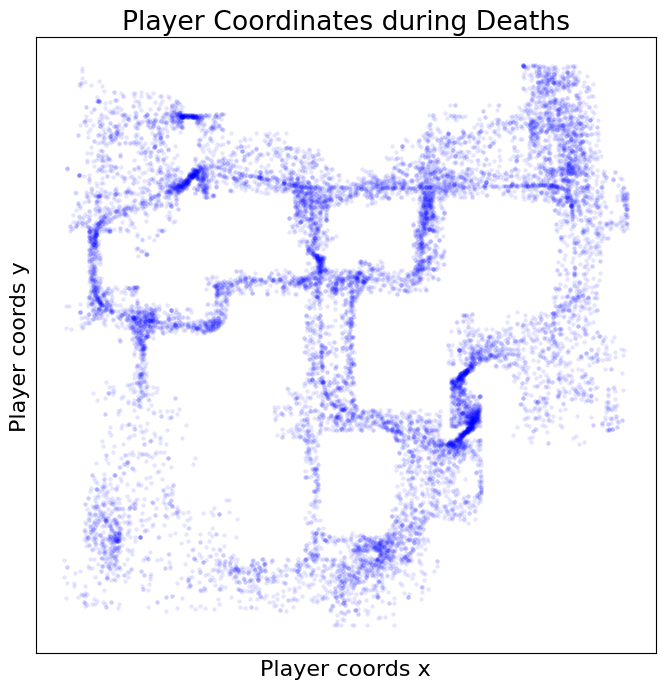

In [46]:
# Assuming info_array is already created and filled with relevant data
# Columns in info_array: [pos1 (x), pos2 (y), pos3 (z), mousex, mousey, kill_flag, death_flag, ak_flag, same_mouse_flag]

# Extract coordinates when a kill occurred
kill_coords = info_array[info_array[:, 5] == 1]  # 5th column is kill_flag
death_coords = info_array[info_array[:, 6] == 1]  # 6th column is death_flag

# Plot 1: Player coordinates when kills happen
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.scatter(kill_coords[:, 0], kill_coords[:, 1], alpha=0.1, s=10, lw=0., color='red')
ax1.set_title('Player Coordinates during Kills')
ax1.set_xlabel('Player coords x')
ax1.set_ylabel('Player coords y')
ax1.set_xticks([])
ax1.set_yticks([])

# Display the figure for kills
fig1.show()

# Save the kills figure if needed
if is_save:
    fig1.savefig(os.path.join(save_path, 'kill_coords.png'), format='png', dpi=500, bbox_inches='tight')


# Plot 2: Player coordinates when deaths happen
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 8))
ax2.scatter(death_coords[:, 0], death_coords[:, 1], alpha=0.1, s=10, lw=0., color='blue')
ax2.set_title('Player Coordinates during Deaths')
ax2.set_xlabel('Player coords x')
ax2.set_ylabel('Player coords y')
ax2.set_xticks([])
ax2.set_yticks([])

# Display the figure for deaths
fig2.show()

# Save the deaths figure if needed
if is_save:
    fig2.savefig(os.path.join(save_path, 'death_coords.png'), format='png', dpi=500, bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_21832\1745627051.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


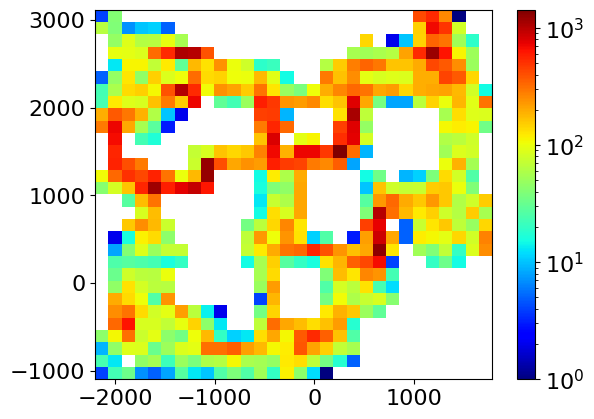

In [33]:
# Create a 2D histogram of player coordinates for a density visualization

fig, ax = plt.subplots(1, 1)
h = ax.hist2d(info_array[:100000, 0], info_array[:100000, 1], bins=30, cmap='jet', norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax=ax)
fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21832\4050104474.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


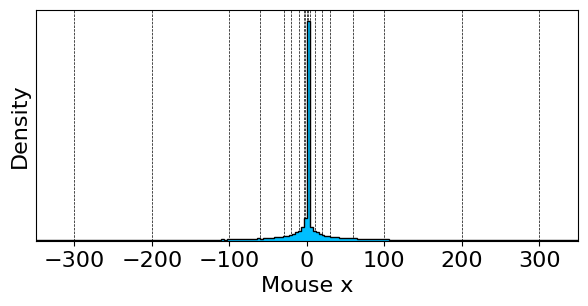

In [34]:
# Create a density plot for mouse x movements

fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.hist(np.clip(info_array[:, 3], -380, 380), alpha=1, bins=200, edgecolor=None, color='deepskyblue', density=True, histtype='bar', zorder=2)
ax.hist(np.clip(info_array[:, 3], -380, 380), alpha=1, bins=200, edgecolor=None, color='k', density=True, histtype='step', lw=1, zorder=3)
for x in [-300.0, -200.0, -100.0, -60.0, -30.0, -20.0, -10.0, -4.0, -2.0, -0.0, 2.0, 4.0, 10.0, 20.0, 30.0, 60.0, 100.0, 200.0, 300.0]:
    ax.axvline(x, zorder=1, color='k', lw=0.5, ls='--')
ax.set_xlabel('Mouse x')
ax.set_ylabel('Density')
ax.set_xlim((-350, 350))
ax.set_yticks([])
fig.show()

# Save the figure if the save flag is set
if is_save:
    fig.savefig(os.path.join(save_path, 'dataset_mousex.pdf'), format='pdf', dpi=1000, bbox_inches='tight')


C:\Users\Admin\AppData\Local\Temp\ipykernel_21832\342391857.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


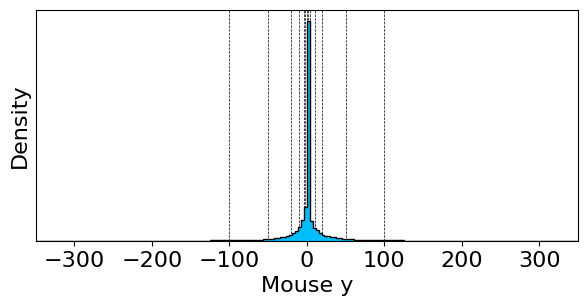

In [35]:
# Create a density plot for mouse y movements

fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.hist(np.clip(info_array[:, 4], -380, 380), alpha=1, bins=200, edgecolor=None, color='deepskyblue', density=True, histtype='bar', zorder=2)
ax.hist(np.clip(info_array[:, 4], -380, 380), alpha=1, bins=200, edgecolor=None, color='k', density=True, histtype='step', lw=1, zorder=3)
for x in [-100.0, -50.0, -20.0, -10.0, -4.0, -2.0, -0.0, 2.0, 4.0, 10.0, 20.0, 50.0, 100.0]:
    ax.axvline(x, zorder=1, color='k', lw=0.5, ls='--')
ax.set_xlabel('Mouse y')
ax.set_ylabel('Density')
ax.set_xlim((-350, 350))
ax.set_yticks([])
fig.show()

# Save the figure if the save flag is set
if is_save:
    fig.savefig(os.path.join(save_path, 'dataset_mousey.pdf'), format='pdf', dpi=1000, bbox_inches='tight')


C:\Users\Admin\AppData\Local\Temp\ipykernel_21832\2032955271.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


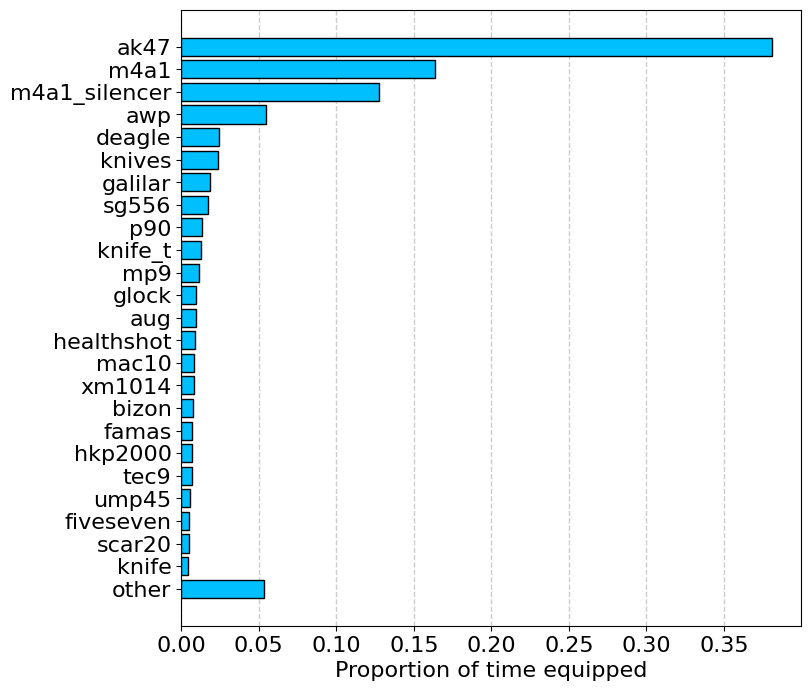

In [36]:
# Create a bar plot to visualize the proportion of time equipped with each weapon

nshow = 25  # Number of weapons to display
nshow = min(nshow, len(weap_count_arr))  # Ensure we don't exceed available weapons
weap_count_arr[-nshow] = weap_count_arr[:-nshow].sum()  # Aggregate remaining counts into 'other'
weap_count_name[-nshow] = 'other'

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.grid(which='both', color='k', linestyle='--', linewidth=1, alpha=0.2, axis='x', markevery=0.05, zorder=1)
ax.barh(np.arange(len(weap_count_arr[-nshow:])), weap_count_arr[-nshow:], align='center', edgecolor='black', color='deepskyblue', zorder=2)
ax.set_yticks(np.arange(len(weap_count_arr[-nshow:])))
ax.set_yticklabels(weap_count_name[-nshow:])
ax.set_xlabel('Proportion of time equipped')
fig.show()

# Save the figure if the save flag is set
if is_save:
    fig.savefig(os.path.join(save_path, 'dataset_equip.pdf'), format='pdf', dpi=1000, bbox_inches='tight')


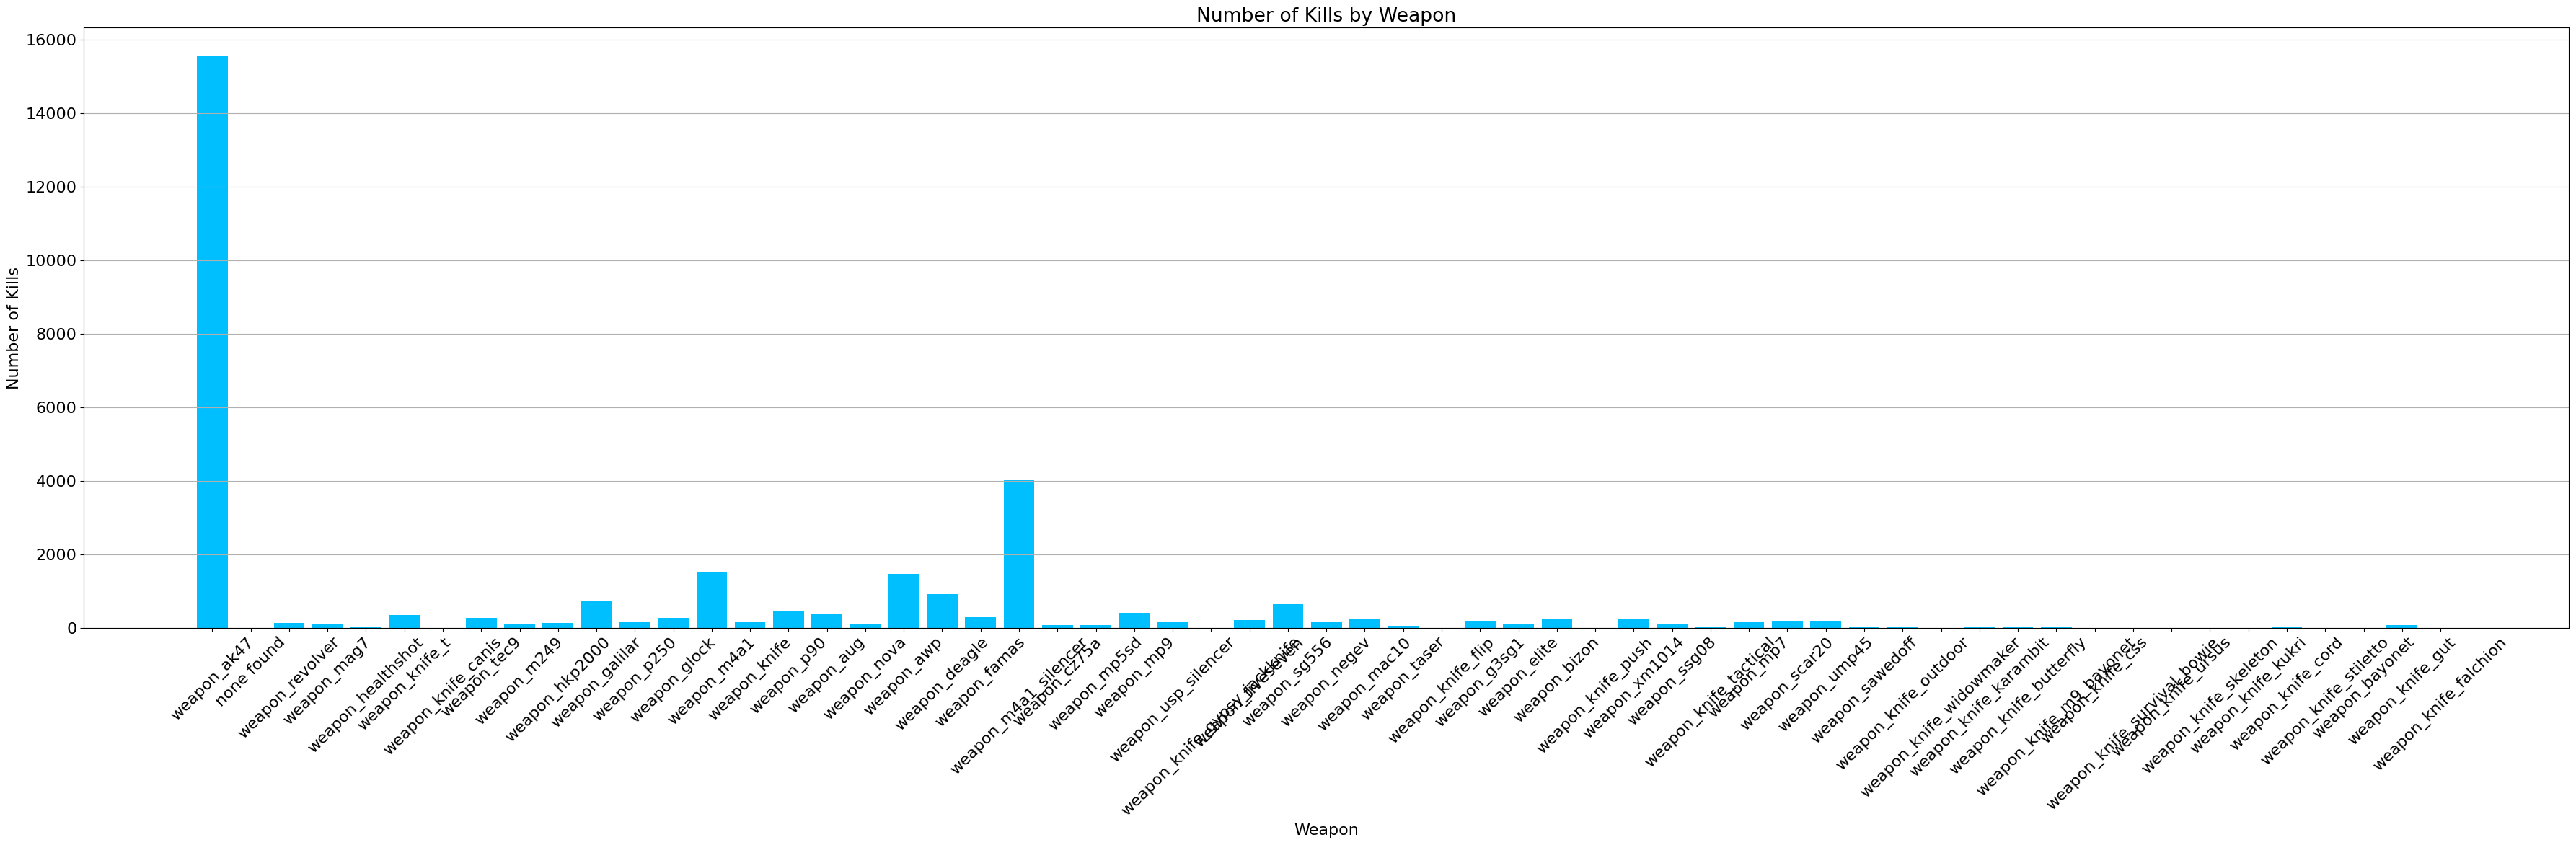

In [37]:
# Initialize a dictionary to count kills by weapon
kill_count_dict = {}

# Iterate through the info_array to aggregate kills
for idx, frame_info in enumerate(info_array):
    weapon_name = weap_arr[idx]  # Get the weapon name
    kill_flag = frame_info[5]     # Get the kill flag

    if weapon_name not in kill_count_dict:
        kill_count_dict[weapon_name] = 0  # Initialize count if not present
    kill_count_dict[weapon_name] += kill_flag  # Increment kill count

# Convert the kill count dictionary to arrays for plotting
weapons = list(kill_count_dict.keys())
kill_counts = list(kill_count_dict.values())

# Create the bar plot
plt.figure(figsize=(36, 12))
plt.bar(weapons, kill_counts, color='deepskyblue')
plt.xlabel('Weapon')
plt.ylabel('Number of Kills')
plt.title('Number of Kills by Weapon')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

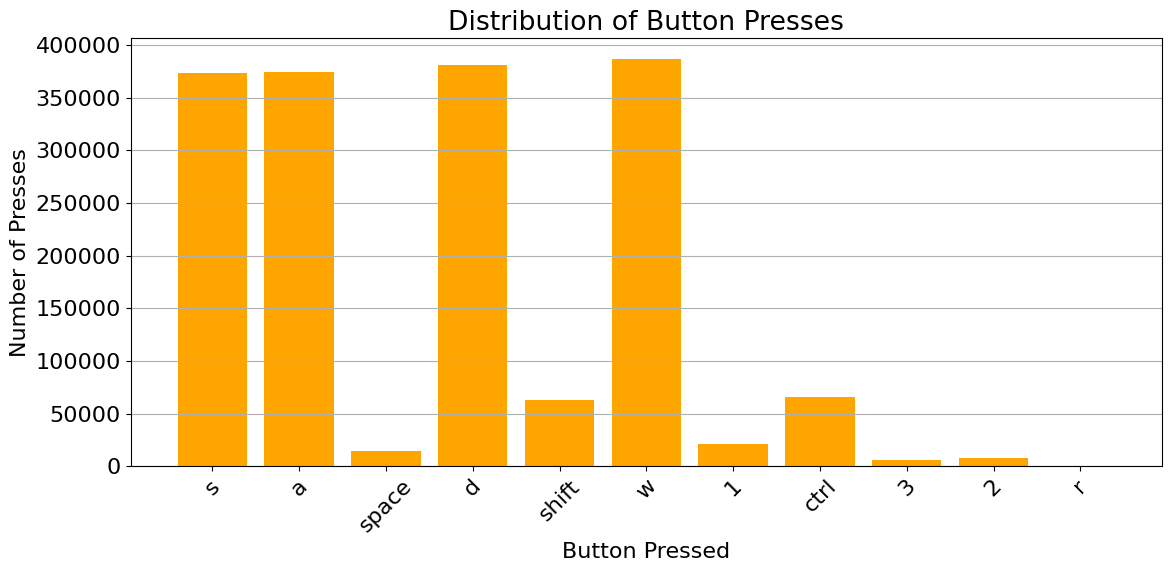

In [38]:
# Create the bar plot of pressed button distribution
plt.figure(figsize=(12, 6))
plt.bar(buttons, press_counts, color='orange')
plt.xlabel('Button Pressed')
plt.ylabel('Number of Presses')
plt.title('Distribution of Button Presses')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()